## Importing modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

## Reading data

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2922 non-null   object 
 1   temp_avg           2922 non-null   object 
 2   temp_min           2922 non-null   float64
 3   temp_max           2922 non-null   float64
 4   temp_observ        2922 non-null   float64
 5   precip             2922 non-null   float64
 6   wind               2922 non-null   float64
 7   wt_fog             2922 non-null   object 
 8   wt_heavy_fog       2922 non-null   object 
 9   wt_thunder         2922 non-null   object 
 10  wt_sleet           2922 non-null   object 
 11  wt_hail            2922 non-null   object 
 12  wt_glaze           2922 non-null   object 
 13  wt_haze            2922 non-null   object 
 14  wt_drift_snow      2922 non-null   object 
 15  wt_high_wind       2922 non-null   object 
 16  wt_mist            2922 

In [4]:
df

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
0,2011-01-01,?,-1.566667,11.973333,2.772727,0.069333,2.575000,1.0,?,?,...,?,?,?,?,?,?,330.0,629.0,959.0,?
1,2011-01-02,?,0.880000,13.806667,7.327273,1.037349,3.925000,1.0,1.0,?,...,?,?,?,?,?,?,130.0,651.0,781.0,?
2,2011-01-03,?,-3.442857,7.464286,-3.060000,1.878824,3.625000,?,?,?,...,?,?,?,?,?,?,120.0,1181.0,1301.0,?
3,2011-01-04,?,-5.957143,4.642857,-3.100000,0.000000,1.800000,?,?,?,...,?,?,?,?,?,?,107.0,1429.0,1536.0,?
4,2011-01-05,?,-4.293333,6.113333,-1.772727,0.000000,2.950000,?,?,?,...,?,?,?,?,?,?,82.0,1489.0,1571.0,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2018-12-27,3.5,-3.591667,9.125000,-1.055556,0.024096,2.100000,1.0,?,?,...,?,?,?,?,?,?,1150.0,4280.0,5430.0,?
2918,2018-12-28,8.233333333333333,0.608333,11.208333,8.088889,16.843820,2.000000,1.0,1.0,?,...,?,?,?,?,?,?,166.0,1959.0,2125.0,?
2919,2018-12-29,9.5,3.925000,12.416667,5.311111,11.550575,3.666667,1.0,1.0,?,...,?,?,?,?,?,?,1756.0,4252.0,6008.0,?
2920,2018-12-30,4.8,0.816667,11.066667,2.088889,0.104651,1.200000,?,?,?,...,?,?,?,?,?,?,1295.0,3634.0,4929.0,?


We can see from the data above that there are lot of missing values so we first replace '?' with null values and then use missing value imputation methods for easier code.

## Data cleaning

In [5]:
# Replace '?' with null values
df.replace(to_replace = '?', value = np.NaN,inplace=True)

In [6]:
df.columns

Index(['date', 'temp_avg', 'temp_min', 'temp_max', 'temp_observ', 'precip',
       'wind', 'wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet', 'wt_hail',
       'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
       'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
       'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown', 'casual', 'registered',
       'total_cust', 'holiday'],
      dtype='object')

In [7]:
# Remove all the null values in weather columns separately as the values should either be 0 or 1
weather_columns = [x for x in df.columns if 'wt' in x]
for i in weather_columns:
  df[i].fillna(0,inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2922 non-null   object 
 1   temp_avg           2101 non-null   object 
 2   temp_min           2922 non-null   float64
 3   temp_max           2922 non-null   float64
 4   temp_observ        2922 non-null   float64
 5   precip             2922 non-null   float64
 6   wind               2922 non-null   float64
 7   wt_fog             2922 non-null   object 
 8   wt_heavy_fog       2922 non-null   object 
 9   wt_thunder         2922 non-null   object 
 10  wt_sleet           2922 non-null   object 
 11  wt_hail            2922 non-null   object 
 12  wt_glaze           2922 non-null   object 
 13  wt_haze            2922 non-null   object 
 14  wt_drift_snow      2922 non-null   object 
 15  wt_high_wind       2922 non-null   object 
 16  wt_mist            2922 

In [9]:
#Convert the columns to float type
df[['wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet', 'wt_hail',
       'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
       'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
       'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown','casual','registered','total_cust','holiday']] = df[['wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet', 'wt_hail',
       'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
       'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
       'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown','casual','registered','total_cust','holiday']].apply(pd.to_numeric)

In [10]:
df

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
0,2011-01-01,NaN,-1.566667,11.973333,2.772727,0.069333,2.575000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,330.0,629.0,959.0,NaN
1,2011-01-02,NaN,0.880000,13.806667,7.327273,1.037349,3.925000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,130.0,651.0,781.0,NaN
2,2011-01-03,NaN,-3.442857,7.464286,-3.060000,1.878824,3.625000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,120.0,1181.0,1301.0,NaN
3,2011-01-04,NaN,-5.957143,4.642857,-3.100000,0.000000,1.800000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,107.0,1429.0,1536.0,NaN
4,2011-01-05,NaN,-4.293333,6.113333,-1.772727,0.000000,2.950000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,82.0,1489.0,1571.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2018-12-27,3.5,-3.591667,9.125000,-1.055556,0.024096,2.100000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1150.0,4280.0,5430.0,NaN
2918,2018-12-28,8.233333333333333,0.608333,11.208333,8.088889,16.843820,2.000000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,166.0,1959.0,2125.0,NaN
2919,2018-12-29,9.5,3.925000,12.416667,5.311111,11.550575,3.666667,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1756.0,4252.0,6008.0,NaN
2920,2018-12-30,4.8,0.816667,11.066667,2.088889,0.104651,1.200000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1295.0,3634.0,4929.0,NaN


We can see all the null values in the weather columns has been cleaned. Now we will impute the missing values in temp_avg column. We take the average of temp_max and temp_min for now for simplicity.

In [11]:
for i,value in enumerate(df['temp_avg']):
    if value in ['NaN','Na','NA',np.NaN]:
        df['temp_avg'][i] = (df['temp_max'][i] + df['temp_min'][i])/2
    else:
        df['temp_avg'][i] = df['temp_avg'][i]
df['temp_avg'] = df['temp_avg'].apply(pd.to_numeric)

C:\Temp\ipykernel_9380\3903279354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp_avg'][i] = (df['temp_max'][i] + df['temp_min'][i])/2
C:\Temp\ipykernel_9380\3903279354.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp_avg'][i] = df['temp_avg'][i]


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2922 non-null   object 
 1   temp_avg           2922 non-null   float64
 2   temp_min           2922 non-null   float64
 3   temp_max           2922 non-null   float64
 4   temp_observ        2922 non-null   float64
 5   precip             2922 non-null   float64
 6   wind               2922 non-null   float64
 7   wt_fog             2922 non-null   float64
 8   wt_heavy_fog       2922 non-null   float64
 9   wt_thunder         2922 non-null   float64
 10  wt_sleet           2922 non-null   float64
 11  wt_hail            2922 non-null   float64
 12  wt_glaze           2922 non-null   float64
 13  wt_haze            2922 non-null   float64
 14  wt_drift_snow      2922 non-null   float64
 15  wt_high_wind       2922 non-null   float64
 16  wt_mist            2922 

In [13]:
df.isnull().sum()

date                    0
temp_avg                0
temp_min                0
temp_max                0
temp_observ             0
precip                  0
wind                    0
wt_fog                  0
wt_heavy_fog            0
wt_thunder              0
wt_sleet                0
wt_hail                 0
wt_glaze                0
wt_haze                 0
wt_drift_snow           0
wt_high_wind            0
wt_mist                 0
wt_drizzle              0
wt_rain                 0
wt_freeze_rain          0
wt_snow                 0
wt_ground_fog           0
wt_ice_fog              0
wt_freeze_drizzle       0
wt_unknown              0
casual                  4
registered              4
total_cust              4
holiday              2833
dtype: int64

Find out the missing values in the columns of total_customers

In [14]:
df[df['casual'].isna()]

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
1848,2016-01-23,-4.366667,-6.128571,-2.392857,-4.688889,42.045946,8.08,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1849,2016-01-24,-2.666667,-7.985714,-1.028571,-6.366667,19.339130,3.75,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1850,2016-01-25,-5.133333,-11.128571,2.028571,-9.877778,0.000000,1.15,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1851,2016-01-26,2.333333,-7.871429,7.471429,3.588889,0.000000,2.85,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


We can see that the 4 missing values in the data is same for all the customers column. We can either impute the data or remove the rows. As it is a time series data, we do the forward filling imputation as the attributes are closer to each other generally in the next timestamp.

In [15]:
df[['casual','registered','total_cust']] = df[['casual','registered','total_cust']].fillna(method = 'ffill')

In [16]:
#Fill the values in holiday as 0 if it is not a holiday else it is given as 1
df['holiday'].fillna(0,inplace=True)

In [17]:
#Round of the values to 2 decimal places
df_v2 = df.round(2)

In [18]:
df_v2.isnull().sum()

date                 0
temp_avg             0
temp_min             0
temp_max             0
temp_observ          0
precip               0
wind                 0
wt_fog               0
wt_heavy_fog         0
wt_thunder           0
wt_sleet             0
wt_hail              0
wt_glaze             0
wt_haze              0
wt_drift_snow        0
wt_high_wind         0
wt_mist              0
wt_drizzle           0
wt_rain              0
wt_freeze_rain       0
wt_snow              0
wt_ground_fog        0
wt_ice_fog           0
wt_freeze_drizzle    0
wt_unknown           0
casual               0
registered           0
total_cust           0
holiday              0
dtype: int64

All the missing values in the data has been cleaned

In [19]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2922 non-null   object 
 1   temp_avg           2922 non-null   float64
 2   temp_min           2922 non-null   float64
 3   temp_max           2922 non-null   float64
 4   temp_observ        2922 non-null   float64
 5   precip             2922 non-null   float64
 6   wind               2922 non-null   float64
 7   wt_fog             2922 non-null   float64
 8   wt_heavy_fog       2922 non-null   float64
 9   wt_thunder         2922 non-null   float64
 10  wt_sleet           2922 non-null   float64
 11  wt_hail            2922 non-null   float64
 12  wt_glaze           2922 non-null   float64
 13  wt_haze            2922 non-null   float64
 14  wt_drift_snow      2922 non-null   float64
 15  wt_high_wind       2922 non-null   float64
 16  wt_mist            2922 

In [20]:
#Cleaned data after missing values imputation
df_v2

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
0,2011-01-01,5.20,-1.57,11.97,2.77,0.07,2.58,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,330.0,629.0,959.0,0.0
1,2011-01-02,7.34,0.88,13.81,7.33,1.04,3.92,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,130.0,651.0,781.0,0.0
2,2011-01-03,2.01,-3.44,7.46,-3.06,1.88,3.62,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,120.0,1181.0,1301.0,0.0
3,2011-01-04,-0.66,-5.96,4.64,-3.10,0.00,1.80,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,107.0,1429.0,1536.0,0.0
4,2011-01-05,0.91,-4.29,6.11,-1.77,0.00,2.95,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,82.0,1489.0,1571.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2018-12-27,3.50,-3.59,9.12,-1.06,0.02,2.10,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1150.0,4280.0,5430.0,0.0
2918,2018-12-28,8.23,0.61,11.21,8.09,16.84,2.00,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,166.0,1959.0,2125.0,0.0
2919,2018-12-29,9.50,3.93,12.42,5.31,11.55,3.67,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1756.0,4252.0,6008.0,0.0
2920,2018-12-30,4.80,0.82,11.07,2.09,0.10,1.20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1295.0,3634.0,4929.0,0.0


## Creating new variables to simplify data analysis 

As we have lots of weather variables, we will simplify the analysis by merging weather columns related to each other to decrease complexity into three categories: rain, fog and ice. All closely related attributes will go into the each if the created category

In [21]:
df_v2['rain'] = df_v2['wt_freeze_rain'] + df_v2['wt_drizzle'] + df_v2['wt_hail'] + df_v2['wt_rain'] + df_v2['wt_thunder'] + df_v2['wt_unknown'] + df_v2['wt_freeze_drizzle']
df_v2['fog'] = df_v2['wt_fog'] + df_v2['wt_ground_fog'] + df_v2['wt_haze'] + df_v2['wt_heavy_fog'] + df_v2['wt_high_wind'] + df_v2['wt_ice_fog'] + df_v2['wt_mist']
df_v2['ice'] = df_v2['wt_drift_snow'] + df_v2['wt_glaze'] + df_v2['wt_sleet'] + df_v2['wt_snow'] 

Make sure the values stay either 1 or 0. 

In [22]:
df_v2['rain'] = df_v2['rain'].apply(lambda x: 0 if x==0 else 1)
df_v2['fog'] = df_v2['fog'].apply(lambda x: 0 if x==0 else 1)
df_v2['ice'] = df_v2['ice'].apply(lambda x: 0 if x==0 else 1)

In [23]:
df_v2['rain'] = df_v2['rain'].astype('category')
df_v2['fog'] = df_v2['fog'].astype('category')
df_v2['ice'] = df_v2['ice'].astype('category')

In [24]:
#Drop all the weather columns to simplify the dataframe
df_v2.drop(columns = weather_columns,inplace=True)

We will use the date column to create more features such as year, month, day so analyse our data more

In [25]:
df_v2['datetime'] = df_v2['date'].apply(pd.to_datetime)

In [26]:
df_v2['year'] = pd.DatetimeIndex(df_v2['datetime']).year
df_v2['month'] = pd.DatetimeIndex(df_v2['datetime']).month_name()
df_v2['dayOfWeek'] = df_v2['datetime'].dt.day_name()

In [27]:
df_v2

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,casual,registered,total_cust,holiday,rain,fog,ice,datetime,year,month,dayOfWeek
0,2011-01-01,5.20,-1.57,11.97,2.77,0.07,2.58,330.0,629.0,959.0,0.0,1,1,0,2011-01-01,2011,January,Saturday
1,2011-01-02,7.34,0.88,13.81,7.33,1.04,3.92,130.0,651.0,781.0,0.0,1,1,0,2011-01-02,2011,January,Sunday
2,2011-01-03,2.01,-3.44,7.46,-3.06,1.88,3.62,120.0,1181.0,1301.0,0.0,0,0,0,2011-01-03,2011,January,Monday
3,2011-01-04,-0.66,-5.96,4.64,-3.10,0.00,1.80,107.0,1429.0,1536.0,0.0,0,0,0,2011-01-04,2011,January,Tuesday
4,2011-01-05,0.91,-4.29,6.11,-1.77,0.00,2.95,82.0,1489.0,1571.0,0.0,0,0,0,2011-01-05,2011,January,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2018-12-27,3.50,-3.59,9.12,-1.06,0.02,2.10,1150.0,4280.0,5430.0,0.0,0,1,0,2018-12-27,2018,December,Thursday
2918,2018-12-28,8.23,0.61,11.21,8.09,16.84,2.00,166.0,1959.0,2125.0,0.0,0,1,0,2018-12-28,2018,December,Friday
2919,2018-12-29,9.50,3.93,12.42,5.31,11.55,3.67,1756.0,4252.0,6008.0,0.0,0,1,0,2018-12-29,2018,December,Saturday
2920,2018-12-30,4.80,0.82,11.07,2.09,0.10,1.20,1295.0,3634.0,4929.0,0.0,0,0,0,2018-12-30,2018,December,Sunday


## Data analysis and visualisation 

In this part we will see basic distribution of the data and plots regarding the same.

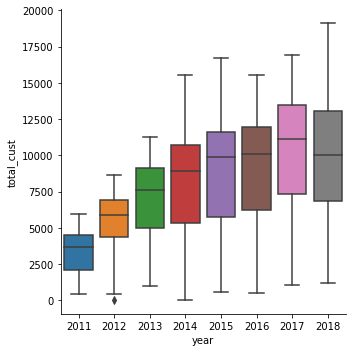

In [28]:
#Plotting total customers during each year
sns.catplot(x='year',y='total_cust',kind='box',data=df_v2)

We can infer from the above plot that the no of registered kept increasing overall during the years. The growth is fastest in the initial years and even though customers were increasing, the growth rate decreased during the recent years

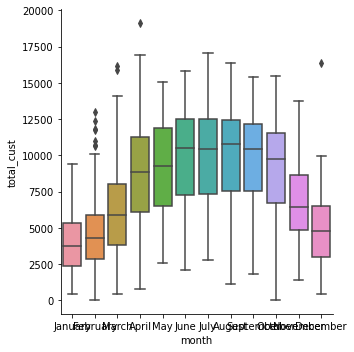

In [29]:
#Plotting total customers during each month
sns.catplot(x='month',y='total_cust',kind='box',data=df_v2)

We can infer from the above plot that the number of customers were higher during the months of April to October typically during Summer and Fall where temperatures are at high compared to Spring and Winter where temperatures are too low so we can see that there are less number of customers overall during those seasons. We can also observe that there are few outliers we on a particular day in february for example, more number of people registered. We can assume there might be few special events that has caused more users to register on that particular day.

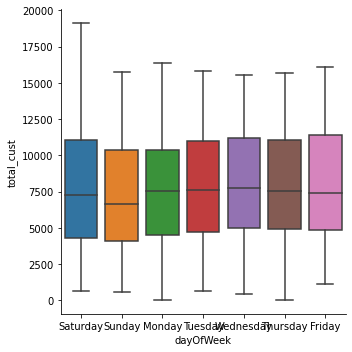

In [30]:
#Plotting total customers per day of the week
sns.catplot(x='dayOfWeek',y='total_cust',kind='box',data=df_v2)

From the above plot we can infer that the number of customers are slightly more during the weekdays compared to weekends. We can assume that many people travel to workplaces during weekdays and they use more rental bikes hence the higher number on weekdays

<AxesSubplot:xlabel='ice', ylabel='total_cust'>

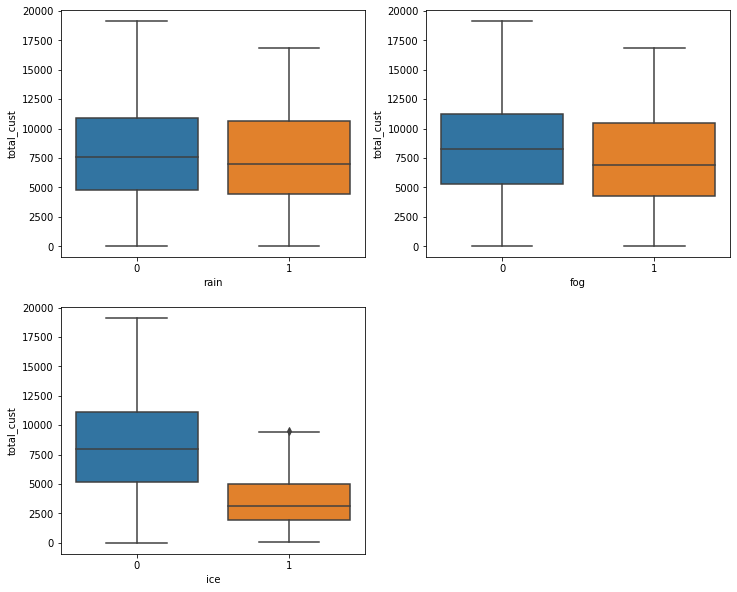

In [31]:
#Plotting total customers during each weather conditions
plt.figure(figsize = [12, 10])
plt.subplot(2,2,1)
sns.boxplot(x='rain',y='total_cust',data=df_v2)
plt.subplot(2,2,2)
sns.boxplot(x='fog',y='total_cust',data=df_v2)
plt.subplot(2,2,3)
sns.boxplot(x='ice',y='total_cust',data=df_v2)


From the plot above, we can analyse the customers behaviour during each particular weather conditions. Rain has only slight effect on the number of customers registered where as fog has a slightly more effect on the demand. But during the snow times, the demand for the rental bikes is very less as less cutomers chose to ride the bikes during snow.

<AxesSubplot:xlabel='holiday', ylabel='total_cust'>

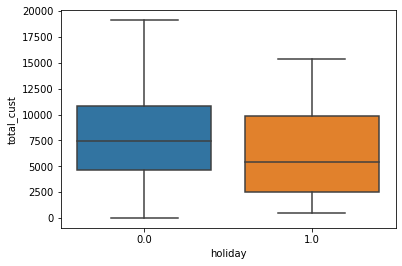

In [32]:
sns.boxplot(x='holiday',y='total_cust',data=df_v2)

In the above plot we can see that, more number of customers booked bikes during non-holidays compared to holidays. We can deduce that going to work has an effect on the demand for the bikes from the above plot

## Correlation plots and analysis

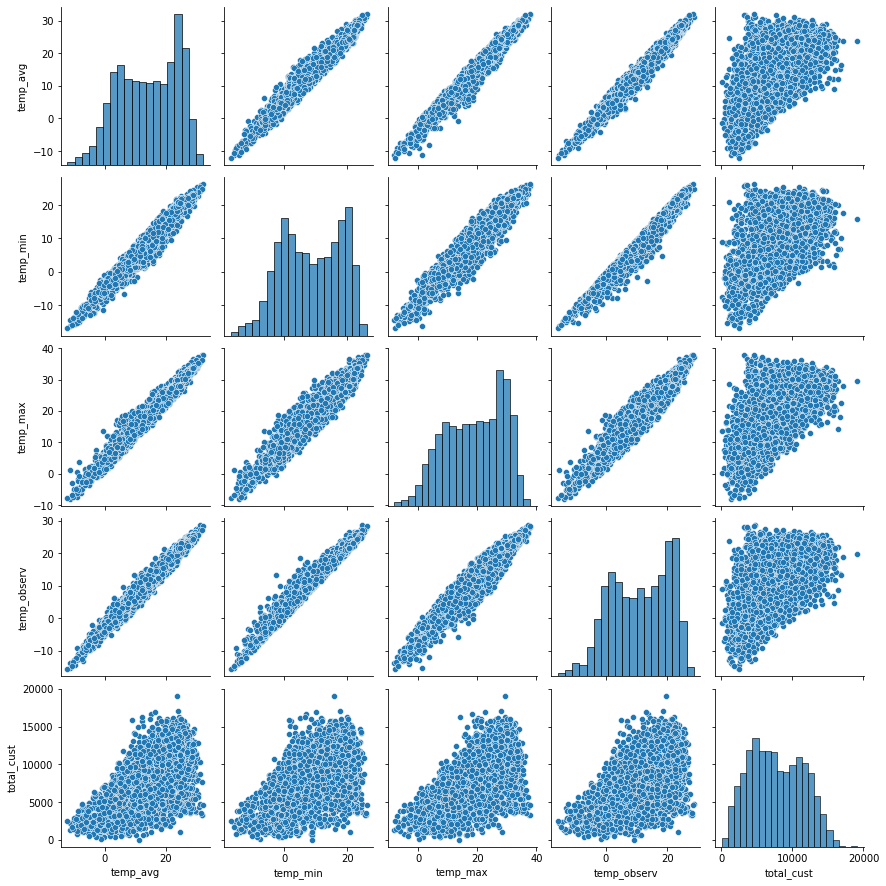

In [33]:
sns.pairplot(df_v2,vars = ['temp_avg','temp_min','temp_max','temp_observ','total_cust'])

In the above plot, we are plotting scatter plots between the temperature values and total customers to observe the relation between them. We can see that there is a perfect linear relation between all temperature values. Also, the temperature features have a medium level linear relationship with the total customers registered

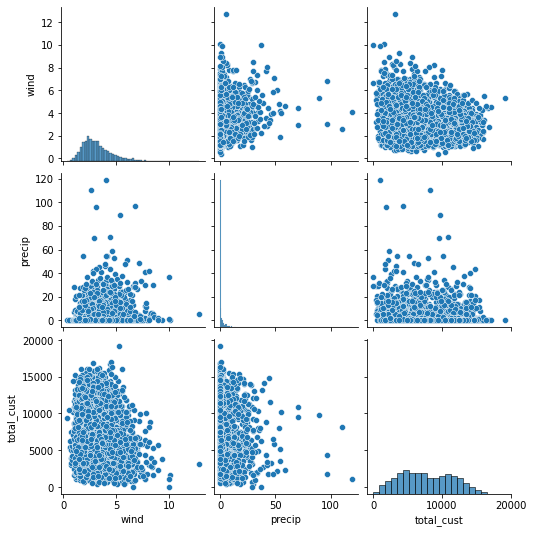

In [34]:
sns.pairplot(df_v2,vars = ['wind','precip','total_cust'])

We can infer from the above plot that wind and precipitation has almost no effect on the total customers 

<AxesSubplot:>

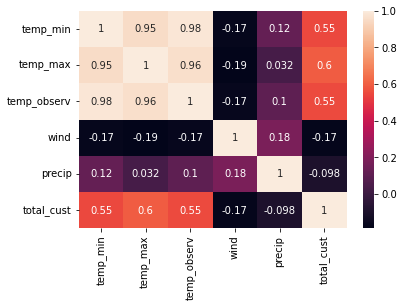

In [35]:
sns.heatmap(df_v2[['temp_min', 'temp_max', 'temp_observ', 'wind', 'precip', 'total_cust']].corr(),annot=True)

The heatmap above provides more accurate relation among the variables. There is no significant correlation between wind, precip and the target variable but we can see that the temperature features has good amount with the target variable

We will use the pearson coefficient test to see the linear relationship between temparature variable and the target variable to get more understanding

In [36]:
print("Pearsonr test temp_avg ",pearsonr(df_v2['temp_avg'],df_v2['total_cust']))
print("Pearsonr test temp_max ",pearsonr(df_v2['temp_max'],df_v2['total_cust']))
print("Pearsonr test temp_min ",pearsonr(df_v2['temp_min'],df_v2['total_cust']))

Pearsonr test temp_avg  (0.5992624450063635, 1.949004444508727e-284)
Pearsonr test temp_max  (0.5962488355634558, 7.022821368268508e-281)
Pearsonr test temp_min  (0.5484041948046313, 3.9423377722020585e-229)


Pearson coefficient tells us how strong the relation is between two variables. From the above results we can see that temp_avg has stronger correlation with the target variable compared to temp_max and temp_min even though the difference is not much

In [37]:
df_v2.describe()

,temp_avg,temp_min,temp_max,temp_observ,precip,wind,casual,registered,total_cust,holiday,year
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,14.072317,8.506598,19.015674,11.069251,3.435623,3.163042,1677.561602,6042.021561,7719.583162,0.030459,2014.499658
std,9.536753,9.473867,9.835377,9.481130,8.183749,1.379595,1560.840858,2757.419767,3746.759171,0.171875,2.291531
min,-12.100000,-16.990000,-7.980000,-15.660000,0.000000,0.380000,2.000000,19.000000,21.000000,0.000000,2011.000000
25%,6.000000,0.520000,11.080000,3.015000,0.010000,2.200000,510.250000,3828.500000,4621.250000,0.000000,2012.250000
50%,14.770000,8.505000,19.990000,11.620000,0.270000,2.900000,1217.500000,5959.000000,7439.000000,0.000000,2014.500000
75%,22.800000,17.337500,27.877500,19.767500,2.887500,3.880000,2355.000000,8183.750000,10847.750000,0.000000,2016.000000
max,32.030000,26.210000,37.850000,28.670000,118.790000,12.750000,10173.000000,15419.000000,19113.000000,1.000000,2018.000000


## Time-series data specific analysis

We are dealing with a time series data. Apart from looking at the correlation plots and disctribution plots, we have to see if the data is stationary or non stationary. We will first plot line plots over time to check if the data is stationary or not. 

<AxesSubplot:title={'center':'Total customers registered over time'}, xlabel='date'>

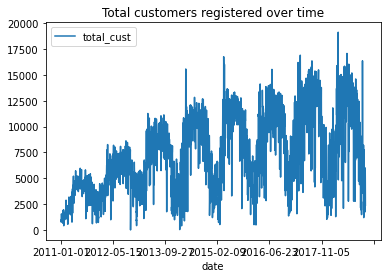

In [38]:
df_v2.plot(x='date',y='total_cust',title='Total customers registered over time')

We can see from the above plot that our time series problem is non-stationary. We have to deal with this before modelling part. For now, we just analyse and make inferences visually and descriptively.

In [41]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(df_v2['total_cust'])

Results of Dickey-Fuller Test:
Test Statistic                   -3.068277
p-value                           0.028992
#Lags Used                       22.000000
Number of Observations Used    2899.000000
Critical Value (1%)              -3.432608
Critical Value (5%)              -2.862538
Critical Value (10%)             -2.567301
dtype: float64


<AxesSubplot:>

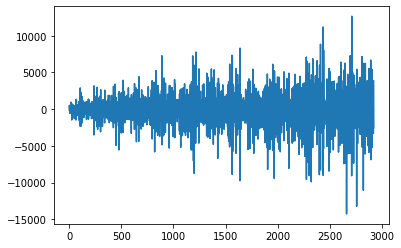

In [46]:
df_v2['total_cust'] = df_v2['total_cust'] - df_v2['total_cust'].shift(1)
df_v2['total_cust'].dropna().plot()

In [47]:
n=7
df_v2['total_cust'] = df_v2['total_cust'] - df_v2['total_cust'].shift(n)

C:\Users\Mahesh\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Mahesh\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

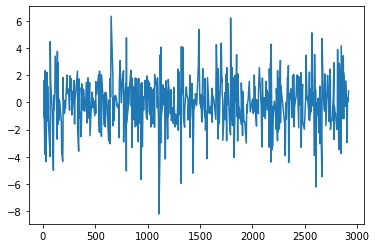

In [49]:
df_v2['total_cust'] = np.log(df_v2['total_cust'])
df_v2['total_cust'] = df_v2['total_cust'] - df_v2['total_cust'].shift(1)
df_v2['total_cust'].dropna().plot()